# Capstone Project 3

# Customer Churn Analysis
A certain bank in North America wants to perform customer churn analysis, as the credit card business of the bank is not performing very well. Churn analysis will help the bank evaluate the customers who have stopped purchasing the credit card of the bank and figure out measures to reduce the bank's customer loss rate.
Ella, a data analyst, has been asked to analyze the banks customers' churn data by performing the tasks given in the upcoming slides.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('DS1_C8_V3_ND_Sprint3_BankChurn_Data.csv')

In [3]:
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Region,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,England,39,5,1,3,12691.0,777,11914.0,1144,42,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,Northern Ireland,44,6,1,2,8256.0,864,7392.0,1291,33,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,England,36,4,1,0,3418.0,0,3418.0,1887,20,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,Wales,34,3,4,1,3313.0,2517,796.0,1171,20,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,England,21,5,1,0,4716.0,0,4716.0,816,28,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,England,40,3,2,3,4003.0,1851,2152.0,15476,117,0.462
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,England,25,4,2,3,4277.0,2186,2091.0,8764,69,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,England,36,5,3,4,5409.0,0,5409.0,10291,60,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,England,36,4,3,3,5281.0,0,5281.0,8395,62,0.000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             9995 non-null   object 
 9   Region                    10127 non-null  object 
 10  Months_on_book            10127 non-null  int64  
 11  Total_Relationship_Count  10127 non-null  int64  
 12  Months_Inactive_12_mon    10127 non-null  int64  
 13  Contacts_Count_12_mon     10127 non-null  int64  
 14  Credit

# Checking for Duplicates

In [6]:
df_dup = df[df.duplicated(keep='first')]

print("\nDuplicate Rows based on all columns:")
df_dup


Duplicate Rows based on all columns:


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Region,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio


# 1. Display the summary statistics of the dataset.

In [7]:
summary_stats = df.describe()
summary_stats

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10067.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.382245,2.787400,35.928409,3.812580,2.341167,2.455317,8703.180550,1162.814061,7469.139637,4404.086304,64.858695,0.274894
std,3.690378e+07,8.341393,6.479135,7.986416,1.554408,1.010622,1.106225,9190.058902,814.987335,9090.685324,3397.129254,23.472570,0.275691
min,7.080821e+08,18.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,510.000000,10.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.500000,359.000000,1324.500000,2155.500000,45.000000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4557.000000,1276.000000,3474.000000,3899.000000,67.000000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11127.500000,1784.000000,9859.000000,4741.000000,81.000000,0.503000
max,8.283431e+08,89.000000,143.000000,56.000000,6.000000,6.000000,6.000000,34664.000000,2517.000000,34516.000000,18484.000000,139.000000,0.999000


# 2. Identify the outliers in the dataset.

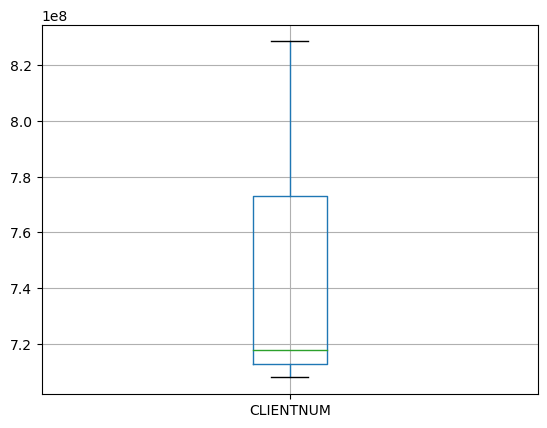

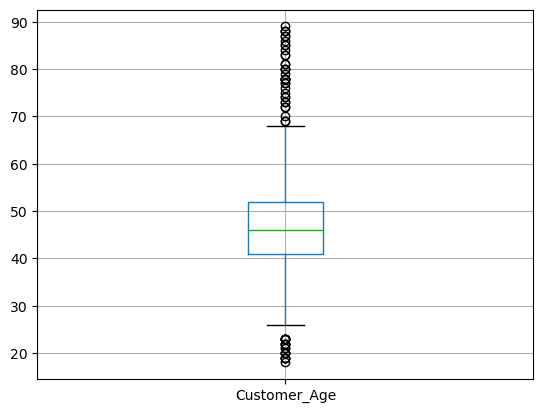

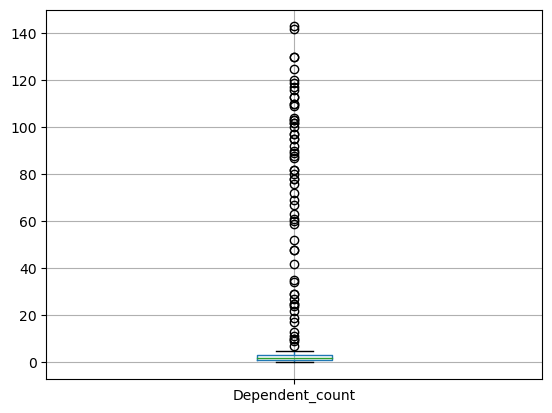

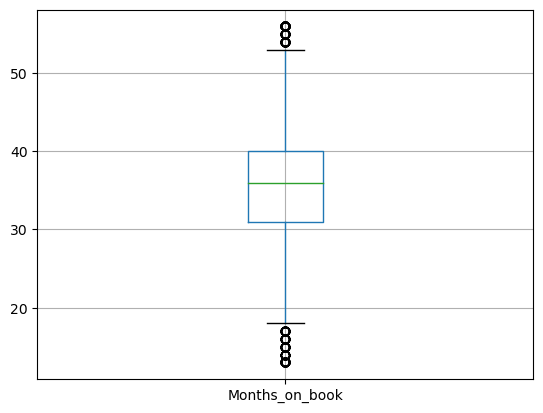

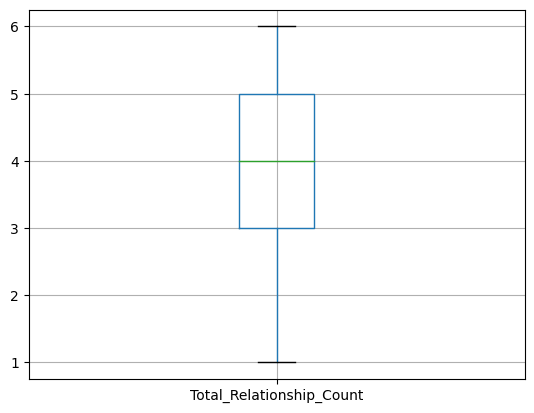

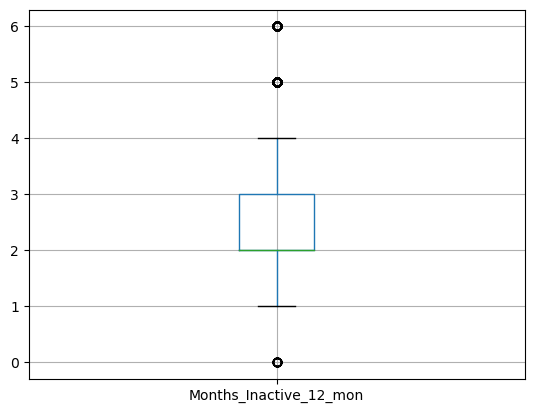

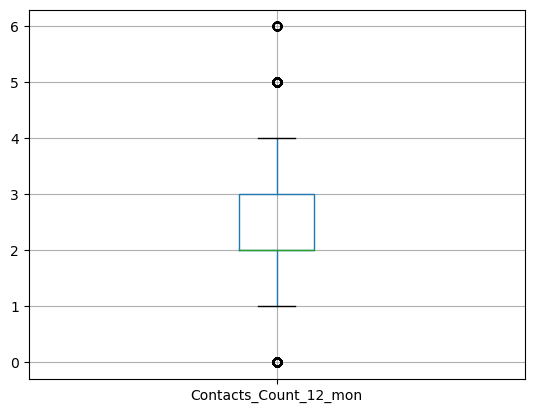

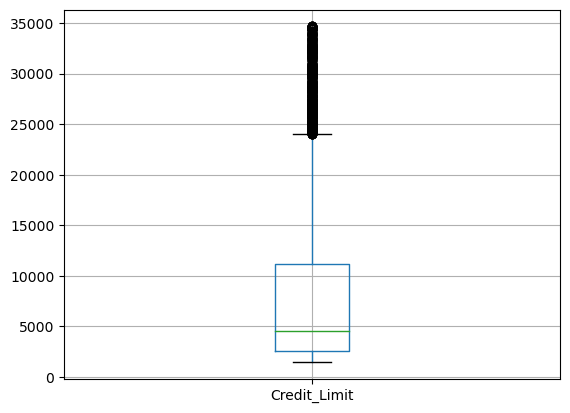

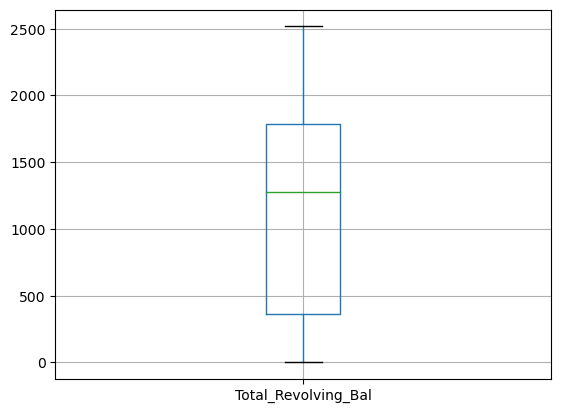

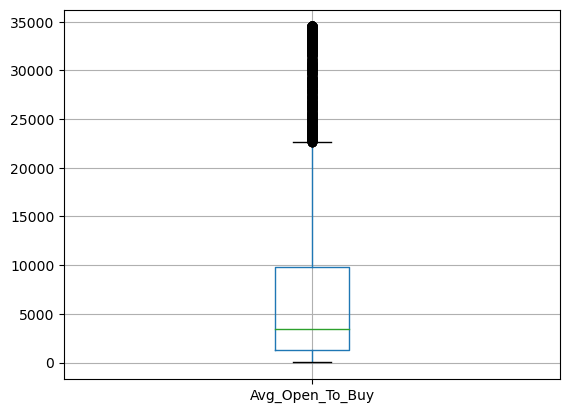

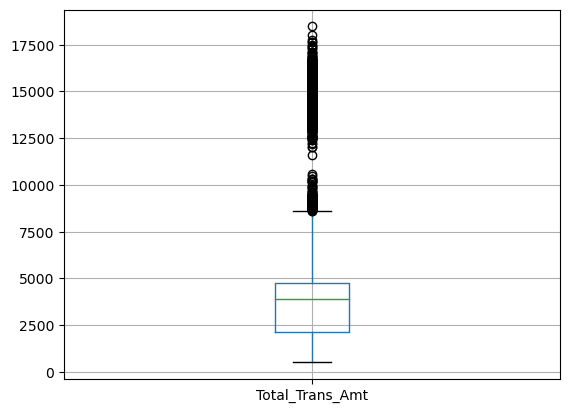

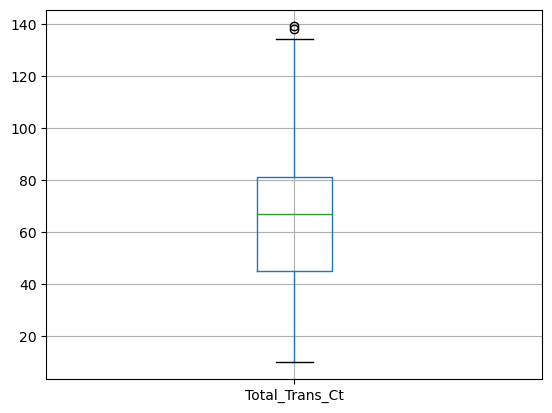

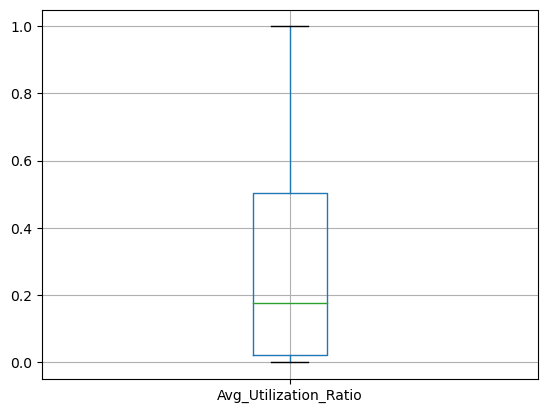

In [8]:
numerical_cols = df.select_dtypes(include=np.number).columns
for col in numerical_cols:
    df.boxplot(column=col)
    plt.show()

# 3. Identify the missing values in the dataset and display the count of missing values.

In [9]:
missing_values = df.isnull().sum()
missing_values

CLIENTNUM                     0
Attrition_Flag                0
Customer_Age                  0
Gender                        0
Dependent_count               0
Education_Level               0
Marital_Status                0
Income_Category               0
Card_Category               132
Region                        0
Months_on_book                0
Total_Relationship_Count      0
Months_Inactive_12_mon        0
Contacts_Count_12_mon         0
Credit_Limit                 60
Total_Revolving_Bal           0
Avg_Open_To_Buy               0
Total_Trans_Amt               0
Total_Trans_Ct                0
Avg_Utilization_Ratio         0
dtype: int64

# 4. Perform data imputation using appropriate methods for the null value columns.

In [10]:
df['Card_Category'].fillna(df['Card_Category'].mode()[0], inplace=True)

In [11]:
df['Credit_Limit'].fillna(df['Credit_Limit'].mean(), inplace=True)

In [12]:
missing_values = df.isnull().sum()
missing_values

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Region                      0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Trans_Amt             0
Total_Trans_Ct              0
Avg_Utilization_Ratio       0
dtype: int64

# new CSV file for loading into Tableau Public.

In [13]:
df.to_csv('preprocessed_BankChurn_data.csv', index=False)